In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re
sns.set()

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [ ]:
toys=pd.read_csv('/content/drive/MyDrive/Amazon Capstone project/main_toys.csv')
toys.head()

,Unnamed: 0,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,brand,main_cat,Polarity,Analysis
0,0,2.0,"09 22, 2016",A1IDMI31WEANAF,0020232233,Mackenzie Kent,comes dm screen space screen absolute premium ...,gale force nine,toys games,-0.242857,Negative
1,1,1.0,"09 18, 2016",A4BCEVVZ4Y3V3,0020232233,Jonathan Christian,open letter galeforce9 unpainted miniatures ba...,gale force nine,toys games,-0.019468,Negative
2,2,3.0,"09 12, 2016",A2EZ9PY1IHHBX0,0020232233,unpreparedtodie,nice art nice printing two panels filled gener...,gale force nine,toys games,0.118243,Positive
3,3,5.0,"03 2, 2017",A139PXTTC2LGHZ,0020232233,Ashley,amazing buy bought gift new dm perfect,gale force nine,toys games,0.578788,Positive
4,4,1.0,"02 8, 2017",A3IB33V29XIL8O,0020232233,Oghma_EM,review gf9 previous screens completely unneces...,gale force nine,toys games,-0.316667,Negative


In [ ]:
toys.isnull().sum()

Unnamed: 0         0
overall            0
reviewTime         0
reviewerID         0
asin               0
reviewerName       0
reviewText      8596
brand            668
main_cat           0
Polarity           0
Analysis           0
dtype: int64

In [ ]:
toys.dropna(inplace= True)

In [ ]:
toys['Analysis'].value_counts()

Positive    6746769
Negative     904868
Neutral      731184
Name: Analysis, dtype: int64

In [ ]:
toys['Analysis'].value_counts(normalize= True)

Positive    0.804833
Negative    0.107943
Neutral     0.087224
Name: Analysis, dtype: float64

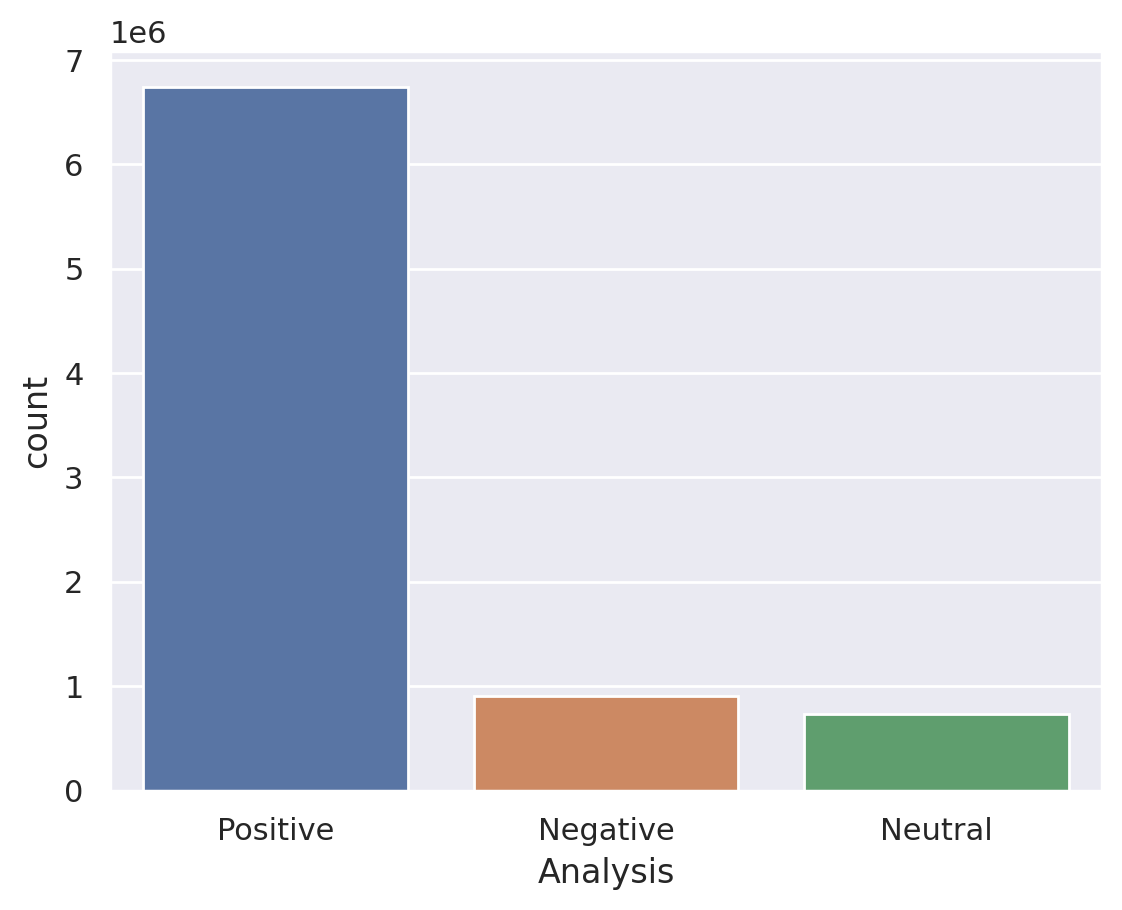

In [ ]:
sns.countplot(data= toys, x= 'Analysis',
             order = toys['Analysis'].value_counts().index);

In [ ]:
toys['text_n_chars'] = toys.reviewText.apply(len) # count all chars in each sentence
toys['text_n_words'] = toys.reviewText.apply(lambda sent: len(sent.split())) # count number

toys.head()

,Unnamed: 0,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,brand,main_cat,Polarity,Analysis,text_n_chars,text_n_words
0,0,2.0,"09 22, 2016",A1IDMI31WEANAF,0020232233,Mackenzie Kent,comes dm screen space screen absolute premium ...,gale force nine,toys games,-0.242857,Negative,231,34
1,1,1.0,"09 18, 2016",A4BCEVVZ4Y3V3,0020232233,Jonathan Christian,open letter galeforce9 unpainted miniatures ba...,gale force nine,toys games,-0.019468,Negative,493,69
2,2,3.0,"09 12, 2016",A2EZ9PY1IHHBX0,0020232233,unpreparedtodie,nice art nice printing two panels filled gener...,gale force nine,toys games,0.118243,Positive,897,133
3,3,5.0,"03 2, 2017",A139PXTTC2LGHZ,0020232233,Ashley,amazing buy bought gift new dm perfect,gale force nine,toys games,0.578788,Positive,38,7
4,4,1.0,"02 8, 2017",A3IB33V29XIL8O,0020232233,Oghma_EM,review gf9 previous screens completely unneces...,gale force nine,toys games,-0.316667,Negative,93,12


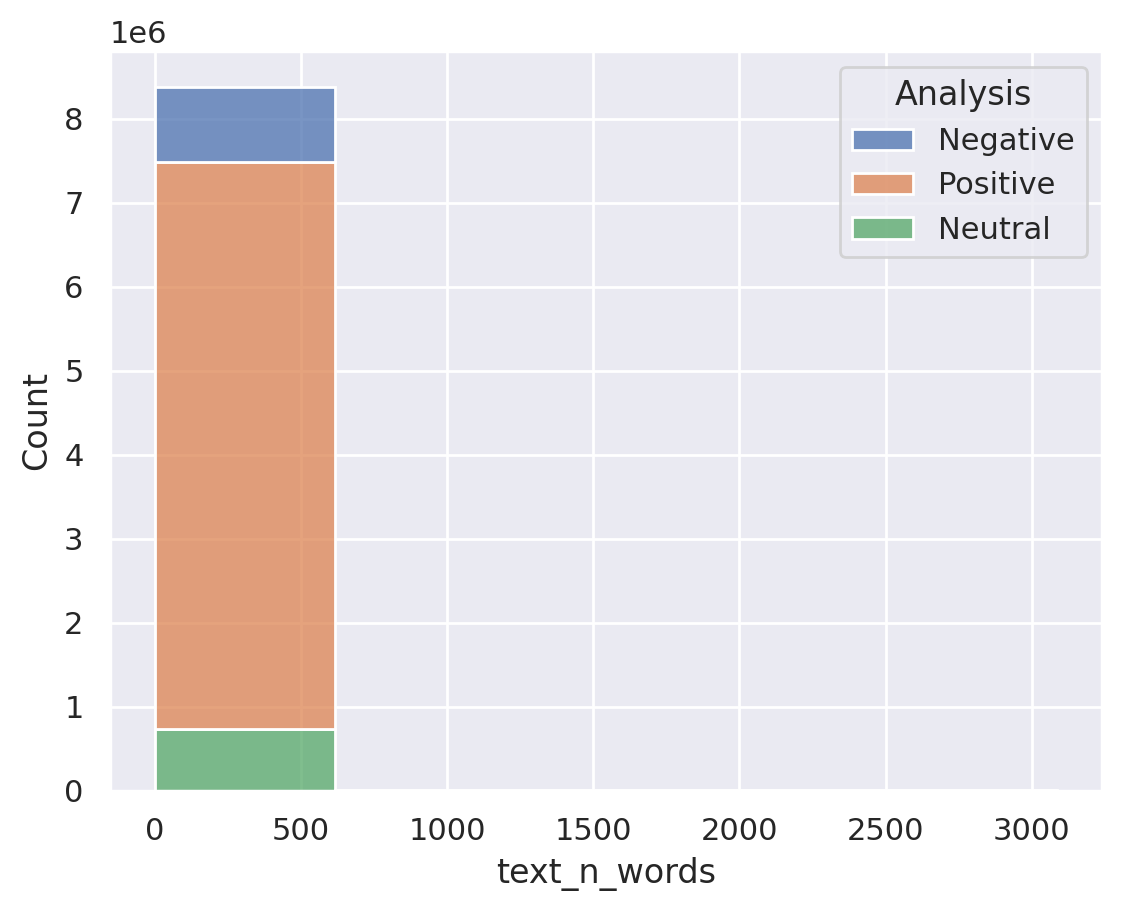

In [ ]:
sns.histplot(data= toys, x= 'text_n_words', hue= 'Analysis',bins=5,multiple= 'stack');

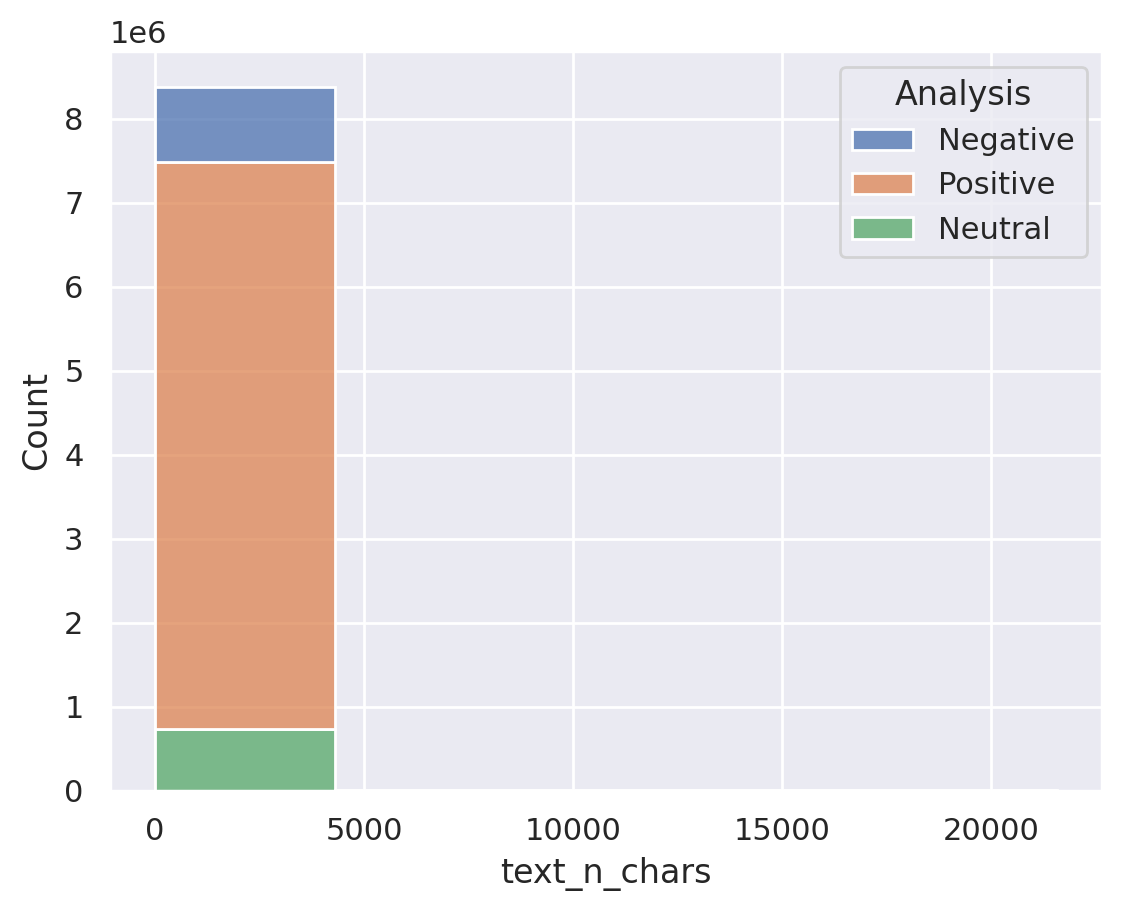

In [ ]:
sns.histplot(data= toys, x= 'text_n_chars', hue= 'Analysis', multiple= 'stack',bins=5);
